# Camaign DataSet

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import xlrd

In [2]:
path=r"C:\Users\$AHIL\Desktop\Merkle Sokrati\Data Analyst Assignment.xlsx"

In [3]:
# Method-1 to read the excel files

wb=xlrd.open_workbook(path)

In [4]:
sheet1=wb.sheet_by_index(0)
for i in range(sheet1.ncols): 
    print(sheet1.cell_value(0, i))

Date
product
phase
campaign_platform
campaign_type
communication_medium
subchannel
audience_type
creative_type
creative_name
device
age
spends
impressions
clicks
link_clicks


In [5]:
# Method-2 to read the excel files

data = pd.read_excel(path, sheet_name='Assignment-1') 

In [6]:
data.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [7]:
data.shape

(16834, 16)

In [8]:
data.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
Date                    16834 non-null datetime64[ns]
product                 16834 non-null object
phase                   16834 non-null object
campaign_platform       16834 non-null object
campaign_type           16834 non-null object
communication_medium    16834 non-null object
subchannel              16834 non-null object
audience_type           16834 non-null object
creative_type           16834 non-null object
creative_name           16834 non-null object
device                  16834 non-null object
age                     16834 non-null object
spends                  16834 non-null float64
impressions             16834 non-null int64
clicks                  16834 non-null int64
link_clicks             16288 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(11)
memory usage: 2.1+ MB


In [10]:
data.nunique()

Date                     257
product                    1
phase                      1
campaign_platform          2
campaign_type              2
communication_medium       2
subchannel                 4
audience_type              4
creative_type              3
creative_name              4
device                     4
age                        7
spends                  9087
impressions             1188
clicks                   263
link_clicks              160
dtype: int64

In [11]:
# We can see that the columns: product and phase are having singular values
# We can drop those columns since the act like constants and doesnt have any impact on predictions

data.drop(["product","phase"],axis=1,inplace=True)

In [12]:
# analysis of audience_type, creative_type and creative_name since it is having lots of missing values

print(data.audience_type.value_counts())
print(data.creative_type.value_counts())
print(data.audience_type.value_counts())

'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64
'-          15101
Image        1130
Carousal      603
Name: creative_type, dtype: int64
'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64


In [13]:
# the above results clearly shows that the unknown string value ie. " '- " is going to create complexity ahead
# so replace them with name "other"
# Note: we cannot replace it with mean median or mode because the count of this factor is much higher then others.

data.audience_type[data.audience_type=="'-"] = "Other"
data.creative_type[data.creative_type=="'-"] = "Other"
data.creative_name[data.creative_name=="'-"] = "Other"

C:\Andaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Andaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Andaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


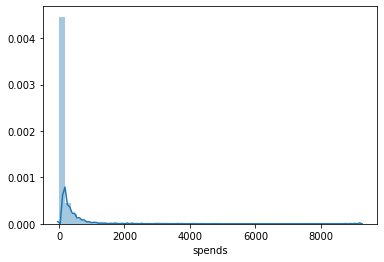

In [14]:
sns.distplot(data.spends)

C:\Andaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Andaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Andaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


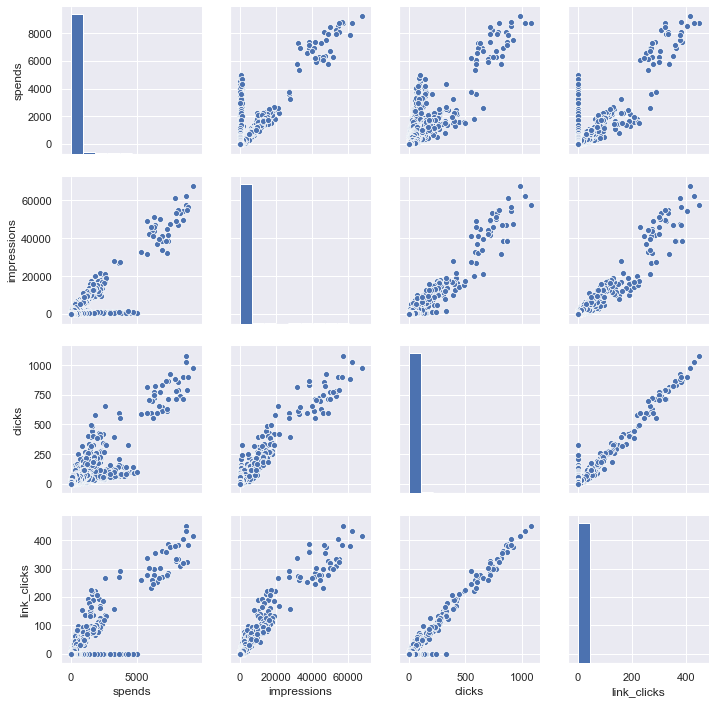

In [15]:
#scatterplot
sns.set()
sns.pairplot(data, size = 2.5)
plt.show();

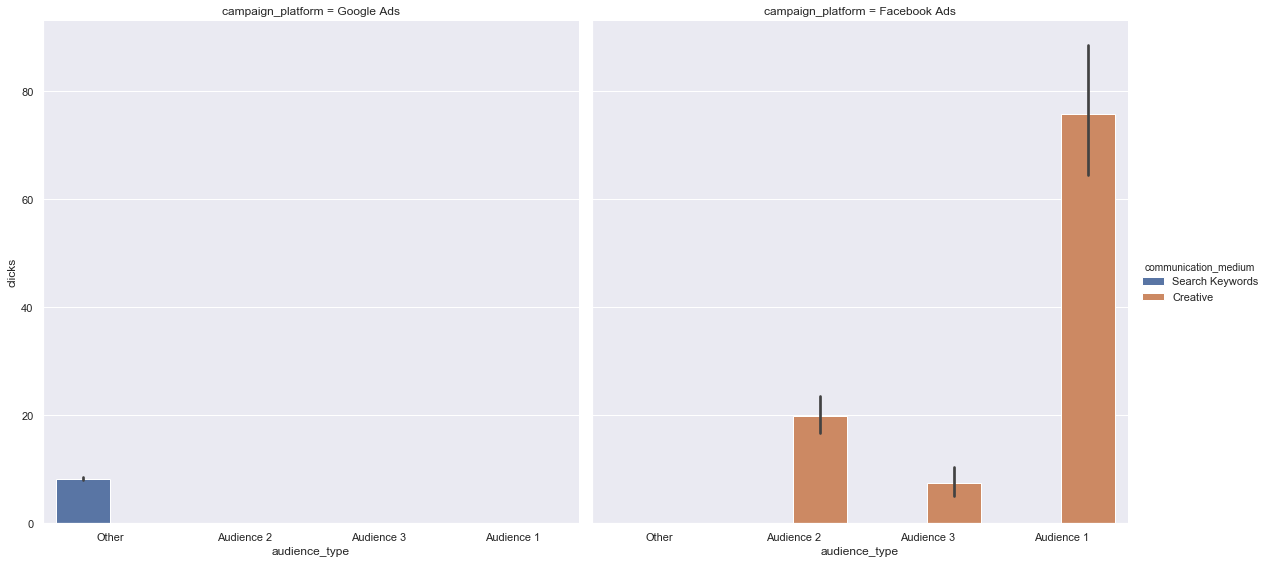

In [16]:
sns.catplot(x="audience_type", y="clicks",
                hue="communication_medium", col="campaign_platform",
                data=data, kind="bar",
                height=8, aspect=1)

# this shows that Google audience data is not present in dataset

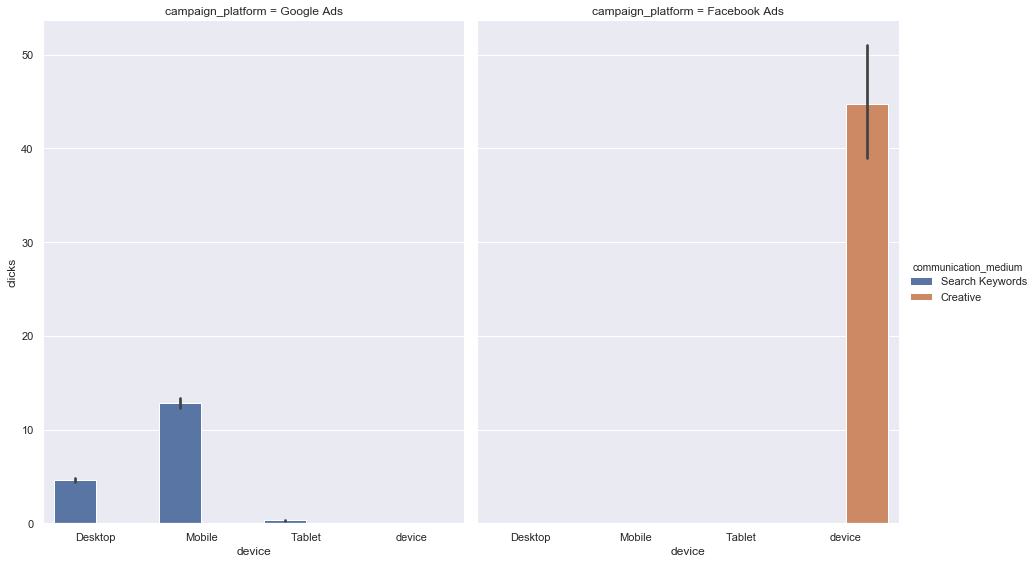

In [17]:
sns.catplot(x="device", y="clicks",
            hue="communication_medium", col="campaign_platform",
            data=data, kind="bar",
            height=8, aspect=.8);

# this shows that the Facebook didnt captured any divice info data

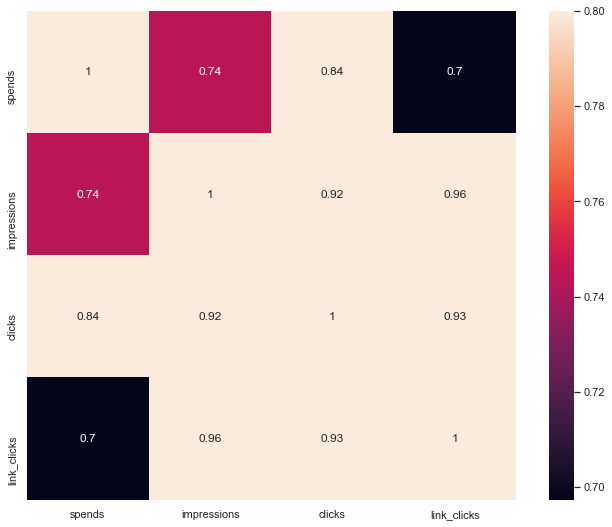

In [18]:
#correlation matrix

numeric_columns = ["spends","impressions","clicks","link_clicks"]

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);

In [19]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'in %'])
missing_data.head(20)

,Total,in %
link_clicks,546,3.243436
clicks,0,0.000000
impressions,0,0.000000
spends,0,0.000000
age,0,0.000000
device,0,0.000000
creative_name,0,0.000000
creative_type,0,0.000000
audience_type,0,0.000000
subchannel,0,0.000000


In [20]:
# factor/categorical Data 

# taking backup of the dataset
df = data.copy("deep")

from sklearn.preprocessing import LabelEncoder
df['campaign_platform'] = LabelEncoder().fit_transform(df['campaign_platform'])
df['communication_medium'] = LabelEncoder().fit_transform(df['communication_medium'])
df['subchannel'] = LabelEncoder().fit_transform(df['subchannel'])
df['device'] = LabelEncoder().fit_transform(df['device'])
df['age'] = LabelEncoder().fit_transform(df['age'])
df['audience_type'] = LabelEncoder().fit_transform(df['audience_type'])
df['creative_type'] = LabelEncoder().fit_transform(df['creative_type'])
df['creative_name'] = LabelEncoder().fit_transform(df['creative_name'])
df['campaign_type'] = LabelEncoder().fit_transform(df['campaign_type'])

In [21]:
# remove date column since we are not doing time series analysis

df.drop("Date",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 13 columns):
campaign_platform       16834 non-null int32
campaign_type           16834 non-null int32
communication_medium    16834 non-null int32
subchannel              16834 non-null int32
audience_type           16834 non-null int32
creative_type           16834 non-null int32
creative_name           16834 non-null int32
device                  16834 non-null int32
age                     16834 non-null int32
spends                  16834 non-null float64
impressions             16834 non-null int64
clicks                  16834 non-null int64
link_clicks             16288 non-null float64
dtypes: float64(2), int32(9), int64(2)
memory usage: 1.1 MB


## Regression Model Building for Predicting Missing Values

In [22]:
# since column link_clicks is having 546 null values, lets build a Predictive ML-Model for them

# since the link_clicks is continuous, lets build Regression Model

# Split the data on the base of link_clicks column: where train = non null data & test = null data

from sklearn.model_selection import train_test_split

test = df[df['link_clicks'].isnull()]
train = df[df['link_clicks'].notnull()]

X,y = train.iloc[:,:-1], train.link_clicks

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# X_test, y_test = test.iloc[:,:-1], test.link_clicks
# X_train, y_train = train.iloc[:,:-1], train.link_clicks

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(10912, 12) (10912,)
(5376, 12) (5376,)


In [24]:
# Linear Regression

from statsmodels.api import OLS
import statsmodels.api as sm

X = sm.add_constant(X_train) 
Xtest = sm.add_constant(X_test) 
linear_reg = sm.OLS(y_train,X).fit()
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            link_clicks   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 2.426e+04
Date:                Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:13:57   Log-Likelihood:                -30230.
No. Observations:               10912   AIC:                         6.048e+04
Df Residuals:                   10901   BIC:                         6.056e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6854      0.341     13.755      0.000       4.018       5.353
campaign_platform       -1.1900      0.231     -5.141      0.000      -1.644      -0.736
campaign_type           -1.1900      0.231     -5.141      0.000      -1.644      -0.736
communication_medium    -1.1900      0.231     -5.141      0.000      -1.644      -0.736
subchannel               0.1953      0.030      6.513      0.000       0.137       0.254
audience_type           -1.3542      0.224     -6.057      0.000      -1.792      -0.916
creative_type           10.1764      0.586     17.358      0.000       9.027      11.326
creative_name           -6.0719      0.351    -17.277      0.000      -6.761      -5.383
device                  -0.3450      0.060     -5.742      0.000      -0.463      -0.227
age                      0.0112      0.019      0.603      0.546      -0.025       0.048
spends                  -0.0072      0.000    -49.320      0.000      -0.008      -0.007
impressions              0.0049   3.86e-05    127.298      0.000       0.005       0.005
clicks                   0.1795      0.003     67.677      0.000       0.174       0.185
==============================================================================
Omnibus:                     9567.361   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4388751.958
Skew:                           3.250   Prob(JB):                         0.00
Kurtosis:                     101.033   Cond. No.                     4.08e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.32e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
pred = linear_reg.predict(X)
residuals=y_train-pred
print("Residuals: ",residuals.mean())  # residuals must be near to zero

# Prediction on splited test data
p1=linear_reg.predict(Xtest)
sse=round(sum((y_test-p1)**2),2)
mse=round(sse/len(y_test),2)

print("SSE = {} \nMSE = {}".format(sse,mse))

Residuals:  -2.5396001691305887e-13
SSE = 82994.08 
MSE = 15.44


In [29]:
# Ridge Regression & Lasso Regression

# to Penalize the Magnitude of Coefficients

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

# ridge = linear_model.Ridge()
# print(cross_val_score(ridge, X_train, y_train, cv=3))


cols = list(data.columns)
cols

cols.remove('link_clicks')
cols

alpha=np.linspace(0.1,0.9,10)
ridge_sse=[]

for a in alpha:
    print('alpha={}'.format(a))
    
    #build ridge model and predict
    r1=linear_model.Ridge(alpha=a).fit(X_train,y_train)
    p2= r1.predict(X_test)

    #calc the sse
    e1=np.mean((p2-y_test)**2)
    ridge_sse.append(e1)

    #print the coefficients
    r_coeff =list(r1.coef_)
    print(list(zip(cols,r_coeff)))
    print("\n")
    
print(ridge_sse)
min(ridge_sse)

#print the sse of 2 models
print("\n\n")
print("MSE: \nLinear_reg = {}, \nRidge = {}".format(mse,min(ridge_sse)))



alpha=0.1
[('Date', -1.188067836852517), ('campaign_platform', -1.1880678368481792), ('campaign_type', -1.188067836843813), ('communication_medium', 0.19537623773097804), ('subchannel', -1.3533756683033897), ('audience_type', 10.145235698542368), ('creative_type', -6.0551529169199), ('creative_name', -0.344992515648597), ('device', 0.011285244918055128), ('age', -0.0072348145569425025), ('spends', 0.004915950955218106), ('impressions', 0.17948879351222405)]


alpha=0.18888888888888888
[('Date', -1.1863558255943907), ('campaign_platform', -1.1863558255961821), ('campaign_type', -1.1863558255984186), ('communication_medium', 0.19540083509935047), ('subchannel', -1.3526896005827969), ('audience_type', 10.11772084156907), ('creative_type', -6.0403619099350205), ('creative_name', -0.3449569402047532), ('device', 0.011322568800003294), ('age', -0.00723542944947232), ('spends', 0.004915945783546154), ('impressions', 0.17950878973603743)]


alpha=0.2777777777777778
[('Date', -1.184651775131711

In [28]:
# Lasso Regression

# lasso = linear_model.Lasso()
# print(cross_val_score(lasso, X_train, y_train, cv=3))

alpha=np.linspace(0.1,0.9,10)
lasso_sse=[]

for a in alpha:
    print('alpha={}'.format(a))
    
    #build ridge model and predict
    l1=linear_model.Lasso(alpha=a).fit(X_train,y_train)
    p3= l1.predict(X_test)

    #calc the sse
    el1=np.mean((p3-y_test)**2)
    lasso_sse.append(el1)

    #print the coefficients
    l_coeff =list(l1.coef_)
    print(list(zip(cols,l_coeff)))
    print("\n")
    
print(lasso_sse)
min(lasso_sse)

print("\n\n")
print("MSE: \nLinear_reg = {}, \nRidge = {}, \nLasso = {}".format(mse,min(ridge_sse),min(lasso_sse)))

alpha=0.1
[('Date', -0.0), ('campaign_platform', -0.0), ('campaign_type', -0.0), ('communication_medium', 0.16576009661956298), ('subchannel', -1.140279893627809), ('audience_type', -0.0), ('creative_type', -0.6629665819998716), ('creative_name', -0.0), ('device', 0.0), ('age', -0.007506281008260995), ('spends', 0.004956494544338766), ('impressions', 0.186137693802092)]


alpha=0.18888888888888888
[('Date', -0.0), ('campaign_platform', -0.0), ('campaign_type', -0.0), ('communication_medium', 0.13294331566037024), ('subchannel', -1.1239777077645225), ('audience_type', -0.0), ('creative_type', -0.38734899430680153), ('creative_name', 0.0), ('device', 0.0), ('age', -0.007544528110757935), ('spends', 0.004983809787536742), ('impressions', 0.18618905817134243)]


alpha=0.2777777777777778
[('Date', -0.0), ('campaign_platform', -0.0), ('campaign_type', -0.0), ('communication_medium', 0.10012641360176742), ('subchannel', -1.1076722274798485), ('audience_type', -0.0), ('creative_type', -0.11173